In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
plt.style.use('jfc') # my custom style sheet
%config InlineBackend.figure_format = 'retina'

In [3]:
text_size = 16
legend_size = 11

In [4]:
energies = np.genfromtxt('TritonEnergy_SN.txt')
energies *= 1e3 # convert from MeV to KeV

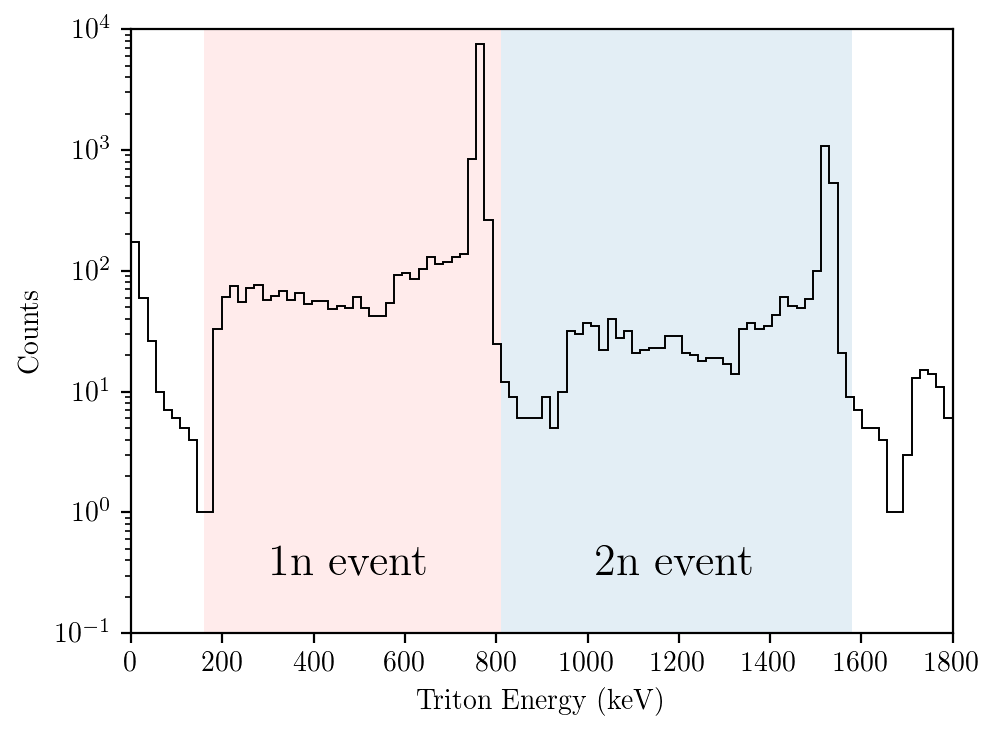

In [14]:
fig1,ax1 = plt.subplots(1,1)

gray1 = patches.Rectangle((160,0.1),650,1e4,linewidth=1,facecolor='r',alpha=0.08)
gray2 = patches.Rectangle((810,0.1),770,1e4,linewidth=1,facecolor='C0',alpha=0.12)
ax1.add_patch(gray1)
ax1.add_patch(gray2)

ax1.text(485,0.3,'1n event',color='black',fontsize=text_size,ha='center')
ax1.text(1195,0.3,'2n event',color='black',fontsize=text_size,ha='center')

ax1.hist(energies,bins=100,range=(0,1800),log=True,histtype='step',color='black',linewidth=0.7)
ax1.set_xlim(0,1800)
ax1.set_ylim(0.1,1e4)
ax1.set_xlabel('Triton Energy (keV)')
ax1.set_ylabel('Counts')

fig1.savefig("He3_charge_deposition.pdf")
plt.show()

In [6]:
E, e11, e12, e21, e22 = np.genfromtxt('efficiencies.txt',usecols=(0,3,4,5,6),unpack=True)

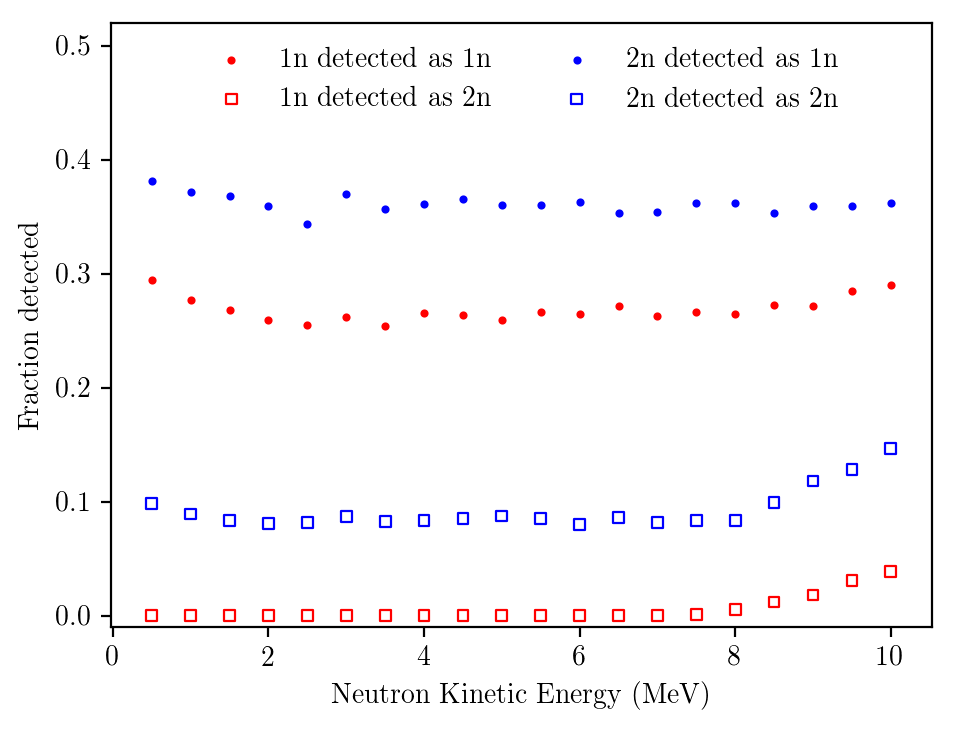

In [7]:
fig2,ax2 = plt.subplots(1,1)

ax2.scatter(E,e11/100.0,color='r',marker='.',s=15,label='1n detected as 1n')
ax2.scatter(E,e12/100.0,color='r',marker='s',s=15,linewidth=0.8,facecolor='none',label='1n detected as 2n')
ax2.scatter(E,e21/100.0,color='b',marker='.',s=15,label='2n detected as 1n')
ax2.scatter(E,e22/100.0,color='b',marker='s',s=15,linewidth=0.8,facecolor='none',label='2n detected as 2n')

ax2.set_ylim(-0.01,0.52)

ax2.legend(ncol=2,loc=9)

ax2.set_xlabel("Neutron Kinetic Energy (MeV)")
ax2.set_ylabel("Fraction detected")

fig2.savefig("halo_eff.pdf")
plt.show()